# Day 1: Data Acquisition, Visualization, and Backtesting: the Easy Way

## New Package: ffn
* Official document: https://pmorissette.github.io/ffn/

In [1]:
!pip install ffn

In [1]:
import matplotlib.pyplot as plt


In [9]:
%matplotlib inline   

#把圖鑲嵌在notebook，若跑不出來就 refresh inline

## Example 1

In [14]:
import ffn

portfolio = ffn.get("2330.tw, 2317.tw, 2891.tw", start = "2019-01-01")

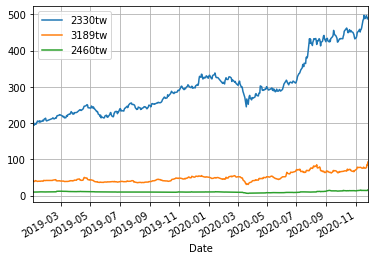

In [8]:
portfolio.plot(grid = True)

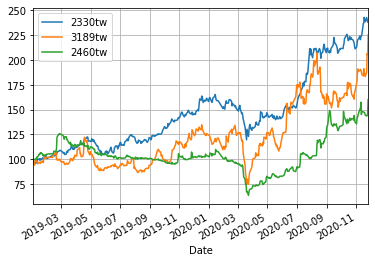

In [9]:
portfolio.rebase().plot(grid = True)     #報酬率

In [14]:
#return_rates = portfolio.diff() / portfolio * 100

In [10]:
return_rates = portfolio.pct_change()

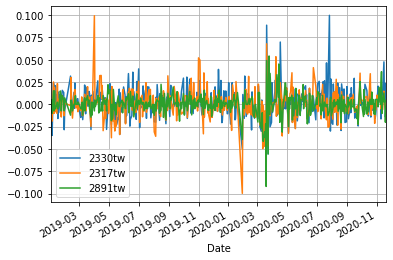

In [17]:
return_rates.plot(grid = True)

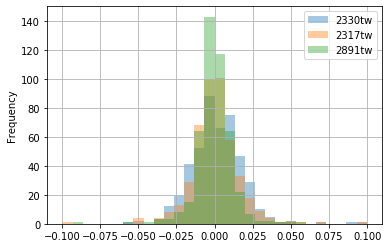

In [19]:
return_rates.plot.hist(alpha = 0.4, grid = True, bins = 30) #bins=幾條histogram

### Statistics Summary

In [20]:
analysis = portfolio.calc_stats()
analysis.display()

Stat                 2330tw      2317tw      2891tw
-------------------  ----------  ----------  ----------
Start                2019-01-02  2019-01-02  2019-01-02
End                  2020-11-20  2020-11-20  2020-11-20
Risk-free rate       0.00%       0.00%       0.00%

Total Return         138.59%     30.14%      8.19%
Daily Sharpe         1.94        0.70        0.33
Daily Sortino        3.70        1.17        0.49
CAGR                 58.67%      15.01%      4.27%
Max Drawdown         -27.63%     -28.56%     -31.13%
Calmar Ratio         2.12        0.53        0.14

MTD                  12.96%      6.45%       8.31%
3m                   18.24%      7.00%       2.89%
6m                   68.23%      16.43%      3.44%
YTD                  50.88%      -4.47%      -8.34%
1Y                   60.46%      -5.61%      -7.30%
3Y (ann.)            58.67%      15.01%      4.27%
5Y (ann.)            -           -           -
10Y (ann.)           -           -           -
Since Incep. (ann.) 

C:\Users\j4a3m\anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


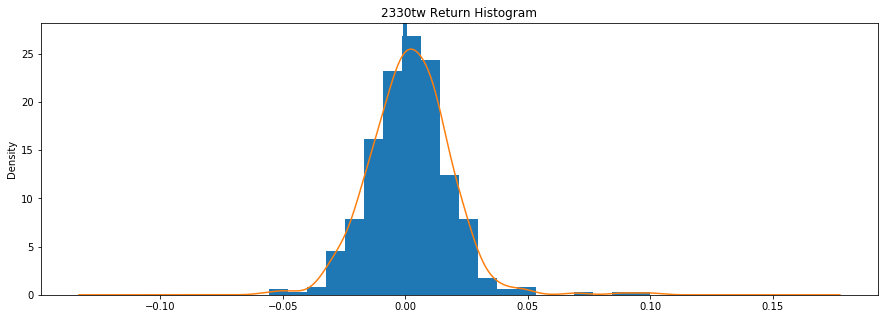

In [23]:
analysis["2330tw"].plot_histogram()

### Correlation

In [11]:
portfolio.corr()

,2330tw,3189tw,2460tw
2330tw,1.000000,0.919448,0.540888
3189tw,0.919448,1.000000,0.507301
2460tw,0.540888,0.507301,1.000000


<module 'matplotlib.pyplot' from 'C:\\Users\\j4a3m\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

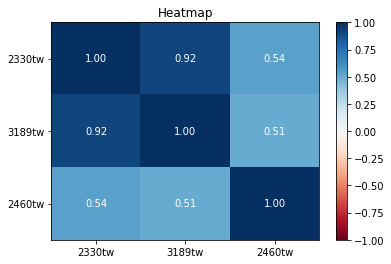

In [12]:
portfolio.plot_corr_heatmap()   #資產間相關程度

## Example 2: International Market

In [26]:
portfolio2 = ffn.get("^TWII, ^DJI, ^GSPC, ^N225, ^GDAXI", start = "2020-01-01")

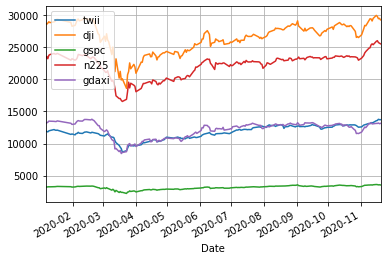

In [27]:
portfolio2.plot(grid = True)

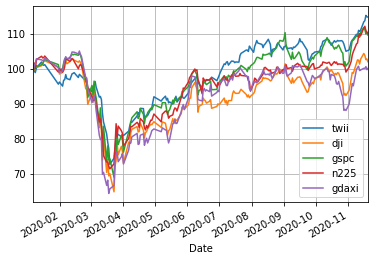

In [28]:
portfolio2.rebase().plot(grid = True)

In [1]:
portfolio2.calc_stats().display()

NameError: name 'portfolio2' is not defined

### Correlation

In [30]:
portfolio2.corr()

,twii,dji,gspc,n225,gdaxi
twii,1.000000,0.858848,0.945699,0.903830,0.828977
dji,0.858848,1.000000,0.962095,0.945914,0.951637
gspc,0.945699,0.962095,1.000000,0.948143,0.914021
n225,0.903830,0.945914,0.948143,1.000000,0.929995
gdaxi,0.828977,0.951637,0.914021,0.929995,1.000000


<module 'matplotlib.pyplot' from 'C:\\Users\\j4a3m\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

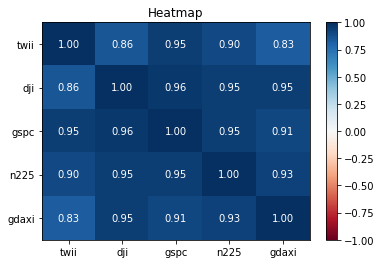

In [32]:
portfolio2.plot_corr_heatmap()

## Example 3: Signal Generation & Backtesting

In [1]:
import ffn
from ffn.utils import clean_ticker

target = "2330.tw"
name = clean_ticker(target)
asset = ffn.get(target, start = "2012-01-01")
print(asset)

                2330tw
Date                  
2012-01-02   51.961472
2012-01-03   52.482571
2012-01-04   52.482571
2012-01-05   56.576954
2012-01-06   56.279179
2012-01-09   56.279179
2012-01-10   56.949165
2012-01-11   56.949165
2012-01-12   57.321392
2012-01-13   57.693607
2012-01-16   56.055851
2012-01-17   56.279179
2012-01-18   57.098042
2012-01-30   58.586926
2012-01-31   58.438034
2012-02-01   57.321392
2012-02-02   57.172508
2012-02-03   56.725838
2012-02-06   57.619156
2012-02-07   57.619156
2012-02-08   57.693607
2012-02-09   58.065819
2012-02-10   57.246941
2012-02-13   57.023609
2012-02-14   57.544716
2012-02-15   58.438034
2012-02-16   58.438034
2012-02-17   59.554676
2012-02-20   59.554676
2012-02-21   59.554676
...                ...
2020-10-19  457.500000
2020-10-20  451.000000
2020-10-21  453.000000
2020-10-22  455.000000
2020-10-23  452.000000
2020-10-26  450.000000
2020-10-27  447.000000
2020-10-28  444.000000
2020-10-29  437.000000
2020-10-30  432.000000
2020-11-02 

### Signal Generation

In [2]:
asset["sma5"] = asset[name].rolling(5).mean()   #5日平均線
asset["sma10"] = asset[name].rolling(10).mean()  #10日平均線

print(asset)

                2330tw        sma5       sma10
Date                                          
2012-01-02   51.961472         NaN         NaN
2012-01-03   52.482571         NaN         NaN
2012-01-04   52.482571         NaN         NaN
2012-01-05   56.576954         NaN         NaN
2012-01-06   56.279179   53.956549         NaN
2012-01-09   56.279179   54.820090         NaN
2012-01-10   56.949165   55.713409         NaN
2012-01-11   56.949165   56.606728         NaN
2012-01-12   57.321392   56.755616         NaN
2012-01-13   57.693607   57.038502   55.497525
2012-01-16   56.055851   56.993836   55.906963
2012-01-17   56.279179   56.859839   56.286624
2012-01-18   57.098042   56.889614   56.748171
2012-01-30   58.586926   57.142721   56.949168
2012-01-31   58.438034   57.291606   57.165054
2012-02-01   57.321392   57.544714   57.269275
2012-02-02   57.172508   57.723380   57.291610
2012-02-03   56.725838   57.648940   57.269277
2012-02-06   57.619156   57.455386   57.299053
2012-02-07   

In [5]:
buy_signal_mask = (asset["sma5"].shift(2) < asset["sma10"].shift(2)) & (asset["sma5"].shift(1) > asset["sma10"].shift(1)) 
#短線突破長線   [0]為今日價格，shift[2]為平移前兩天

sell_signal_mask = (asset["sma5"].shift(2) > asset["sma10"].shift(2)) & (asset["sma5"].shift(1) < asset["sma10"].shift(1))
#長線突破短線

In [6]:
print(buy_signal_mask)

Date
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-09    False
2012-01-10    False
2012-01-11    False
2012-01-12    False
2012-01-13    False
2012-01-16    False
2012-01-17    False
2012-01-18    False
2012-01-30    False
2012-01-31    False
2012-02-01    False
2012-02-02    False
2012-02-03    False
2012-02-06    False
2012-02-07    False
2012-02-08    False
2012-02-09    False
2012-02-10    False
2012-02-13    False
2012-02-14     True
2012-02-15    False
2012-02-16    False
2012-02-17    False
2012-02-20    False
2012-02-21    False
              ...  
2020-10-19    False
2020-10-20    False
2020-10-21    False
2020-10-22    False
2020-10-23    False
2020-10-26    False
2020-10-27    False
2020-10-28    False
2020-10-29    False
2020-10-30    False
2020-11-02    False
2020-11-03    False
2020-11-04    False
2020-11-05    False
2020-11-06    False
2020-11-09     True
2020-11-10    False
2020-11-11    False
2020-11-12    F

In [7]:
print(sell_signal_mask)

Date
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-09    False
2012-01-10    False
2012-01-11    False
2012-01-12    False
2012-01-13    False
2012-01-16    False
2012-01-17    False
2012-01-18    False
2012-01-30    False
2012-01-31    False
2012-02-01    False
2012-02-02    False
2012-02-03    False
2012-02-06    False
2012-02-07    False
2012-02-08    False
2012-02-09     True
2012-02-10    False
2012-02-13    False
2012-02-14    False
2012-02-15    False
2012-02-16    False
2012-02-17    False
2012-02-20    False
2012-02-21    False
              ...  
2020-10-19    False
2020-10-20    False
2020-10-21    False
2020-10-22     True
2020-10-23    False
2020-10-26    False
2020-10-27    False
2020-10-28    False
2020-10-29    False
2020-10-30    False
2020-11-02    False
2020-11-03    False
2020-11-04    False
2020-11-05    False
2020-11-06    False
2020-11-09    False
2020-11-10    False
2020-11-11    False
2020-11-12    F

### Plotting

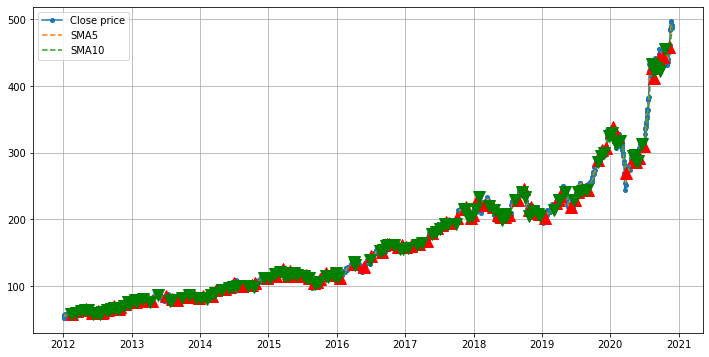

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.plot(asset[name], ".-", markersize = 8)
plt.plot(asset["sma5"], linestyle = "--")
plt.plot(asset["sma10"], linestyle = "--")
plt.plot(asset[name][buy_signal_mask], "r^", markersize = 12)
plt.plot(asset[name][sell_signal_mask], "gv", markersize = 12)
plt.grid(True)
plt.legend(["Close price", "SMA5", "SMA10"])

#### Backtesting: Long Only

In [11]:
position = False
asset["PV"] = 0.0
turnovers = 0

for i, t in enumerate(asset.index):
    
    if not position:   #無持倉狀態為true時
        
        payoff = 0
        asset["PV"].iloc[i] = asset["PV"].iloc[i - 1] + payoff
        
        if buy_signal_mask[t]:    #如果有買進訊號
            position = True
            turnovers = turnovers + 1
            print(">" * 5, "Create a long position.")
    else:
        
        payoff = asset[name].iloc[i] - asset[name].iloc[i - 1]     #累積損益
        asset["PV"].iloc[i] = asset["PV"].iloc[i - 1] + payoff
       
        if sell_signal_mask[t]:                                   #平倉訊號
            position = False
            print("<" * 5, "Close a long position.")
            print("{} -> {:.2f} -> {:.2f}".format(t, asset[name][t], asset["PV"][t]))

print("Number of turnovers:", turnovers)

>>>>> Create a long position.
<<<<< Close a long position.
2012-03-08 00:00:00 -> 59.33 -> 1.79
>>>>> Create a long position.
<<<<< Close a long position.
2012-04-05 00:00:00 -> 61.86 -> 1.71
>>>>> Create a long position.
<<<<< Close a long position.
2012-04-27 00:00:00 -> 64.02 -> 2.46
>>>>> Create a long position.
<<<<< Close a long position.
2012-05-11 00:00:00 -> 63.65 -> 0.30
>>>>> Create a long position.
<<<<< Close a long position.
2012-06-06 00:00:00 -> 57.92 -> -1.27
>>>>> Create a long position.
<<<<< Close a long position.
2012-07-13 00:00:00 -> 58.51 -> -5.43
>>>>> Create a long position.
<<<<< Close a long position.
2012-07-27 00:00:00 -> 61.21 -> -3.12
>>>>> Create a long position.
<<<<< Close a long position.
2012-08-24 00:00:00 -> 63.30 -> -0.80
>>>>> Create a long position.
<<<<< Close a long position.
2012-08-29 00:00:00 -> 63.84 -> -0.57
>>>>> Create a long position.
<<<<< Close a long position.
2012-09-11 00:00:00 -> 65.15 -> -0.19
>>>>> Create a long position.
<<<<

>>>>> Create a long position.
<<<<< Close a long position.
2020-05-19 00:00:00 -> 287.61 -> 124.24
>>>>> Create a long position.
<<<<< Close a long position.
2020-05-29 00:00:00 -> 288.10 -> 119.80
>>>>> Create a long position.
<<<<< Close a long position.
2020-06-18 00:00:00 -> 312.78 -> 141.03
>>>>> Create a long position.
<<<<< Close a long position.
2020-08-10 00:00:00 -> 433.12 -> 263.86
>>>>> Create a long position.
<<<<< Close a long position.
2020-08-18 00:00:00 -> 430.64 -> 267.83
>>>>> Create a long position.
<<<<< Close a long position.
2020-08-21 00:00:00 -> 422.18 -> 277.28
>>>>> Create a long position.
<<<<< Close a long position.
2020-09-04 00:00:00 -> 426.66 -> 271.31
>>>>> Create a long position.
<<<<< Close a long position.
2020-09-24 00:00:00 -> 423.00 -> 251.74
>>>>> Create a long position.
<<<<< Close a long position.
2020-10-22 00:00:00 -> 455.00 -> 263.74
>>>>> Create a long position.
Number of turnovers: 122


### Performance Report

In [40]:
asset["DD of our strategy"] = (asset["PV"] - asset["PV"].cummax()).cummin()  #cummax=(部位最小值-部位最大值)圖形的最低點(cummin)
dd_idx = asset["DD of our strategy"].idxmin()

In [41]:
asset["buy&hold"] = asset[name].diff().cumsum()
asset["DD of buy&hold"] = (asset["buy&hold"] - asset["buy&hold"].cummax()).cummin()
dd_idx2 = asset["DD of buy&hold"].idxmin()

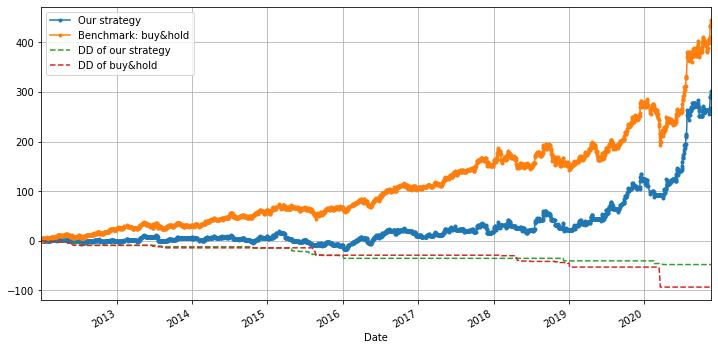

In [42]:
asset[["PV", "buy&hold"]].plot(style = ".-", grid = True, figsize = (12, 6))
ax = asset["DD of our strategy"].plot(style = "--", grid = True)
ax = asset["DD of buy&hold"].plot(style = "--", grid = True)
ax.legend(["Our strategy", "Benchmark: buy&hold", "DD of our strategy", "DD of buy&hold"])

## Exercise: Extension to Example 3
* Modify Example 3 so that the program can allow short positions.

In [43]:
position = False
asset["PV"] = 0.0
turnovers = 0

for i, t in enumerate(asset.index):
    
    if not position:
        
        payoff = 0
        
        if buy_signal_mask[t]:
            position = True
            turnovers = turnovers + 1
            print(">" * 5, "Create a long position.")
            
        if sell_signal_mask[t]:
            position = True
            turnovers = turnovers + 1
            print(">" * 5, "Create a short position.")
    else:
        
        payoff = asset[name].iloc[i] - asset[name].iloc[i - 1]
       
        if sell_signal_mask[t]:
            position = False
            print("<" * 5, "Close a long position.")
            
        if buy_signal_mask[t]:
            position = False
            payoff = -payoff
            print("<" * 5, "Close a short position.")
            
            
    asset["PV"].iloc[i] = asset["PV"].iloc[i - 1] + payoff
    print("{} -> {:.2f} -> {:.2f}".format(t, asset[name][t], asset["PV"][t]))

print("Number of turnovers", turnovers)

2012-01-02 00:00:00 -> 51.96 -> 0.00
2012-01-03 00:00:00 -> 52.48 -> 0.00
2012-01-04 00:00:00 -> 52.48 -> 0.00
2012-01-05 00:00:00 -> 56.58 -> 0.00
2012-01-06 00:00:00 -> 56.28 -> 0.00
2012-01-09 00:00:00 -> 56.28 -> 0.00
2012-01-10 00:00:00 -> 56.95 -> 0.00
2012-01-11 00:00:00 -> 56.95 -> 0.00
2012-01-12 00:00:00 -> 57.32 -> 0.00
2012-01-13 00:00:00 -> 57.69 -> 0.00
2012-01-16 00:00:00 -> 56.06 -> 0.00
2012-01-17 00:00:00 -> 56.28 -> 0.00
2012-01-18 00:00:00 -> 57.10 -> 0.00
2012-01-30 00:00:00 -> 58.59 -> 0.00
2012-01-31 00:00:00 -> 58.44 -> 0.00
2012-02-01 00:00:00 -> 57.32 -> 0.00
2012-02-02 00:00:00 -> 57.17 -> 0.00
2012-02-03 00:00:00 -> 56.73 -> 0.00
2012-02-06 00:00:00 -> 57.62 -> 0.00
2012-02-07 00:00:00 -> 57.62 -> 0.00
2012-02-08 00:00:00 -> 57.69 -> 0.00
>>>>> Create a short position.
2012-02-09 00:00:00 -> 58.07 -> 0.00
2012-02-10 00:00:00 -> 57.25 -> -0.82
2012-02-13 00:00:00 -> 57.02 -> -1.04
<<<<< Close a short position.
2012-02-14 00:00:00 -> 57.54 -> -1.56
2012-02-15 

2013-08-19 00:00:00 -> 75.79 -> 2.67
2013-08-20 00:00:00 -> 74.91 -> 2.67
2013-08-22 00:00:00 -> 74.99 -> 2.67
2013-08-23 00:00:00 -> 76.98 -> 2.67
2013-08-26 00:00:00 -> 76.82 -> 2.67
2013-08-27 00:00:00 -> 75.87 -> 2.67
2013-08-28 00:00:00 -> 76.82 -> 2.67
>>>>> Create a long position.
2013-08-29 00:00:00 -> 78.33 -> 2.67
2013-08-30 00:00:00 -> 79.75 -> 4.10
2013-09-02 00:00:00 -> 80.94 -> 5.29
2013-09-03 00:00:00 -> 80.94 -> 5.29
2013-09-04 00:00:00 -> 79.75 -> 4.10
2013-09-05 00:00:00 -> 80.55 -> 4.89
2013-09-06 00:00:00 -> 80.94 -> 5.29
2013-09-09 00:00:00 -> 81.74 -> 6.08
2013-09-10 00:00:00 -> 82.93 -> 7.27
2013-09-11 00:00:00 -> 82.93 -> 7.27
2013-09-12 00:00:00 -> 82.13 -> 6.48
2013-09-13 00:00:00 -> 81.34 -> 5.68
2013-09-16 00:00:00 -> 83.72 -> 8.06
2013-09-17 00:00:00 -> 83.72 -> 8.06
2013-09-18 00:00:00 -> 81.74 -> 6.08
2013-09-23 00:00:00 -> 83.72 -> 8.06
2013-09-24 00:00:00 -> 83.33 -> 7.67
2013-09-25 00:00:00 -> 81.74 -> 6.08
2013-09-26 00:00:00 -> 80.55 -> 4.89
<<<<< Cl

2014-12-24 00:00:00 -> 111.97 -> 9.95
2014-12-25 00:00:00 -> 111.57 -> 9.54
2014-12-26 00:00:00 -> 112.79 -> 10.76
2014-12-29 00:00:00 -> 114.41 -> 12.38
2014-12-30 00:00:00 -> 113.60 -> 11.57
2014-12-31 00:00:00 -> 114.41 -> 12.38
2015-01-05 00:00:00 -> 113.19 -> 11.17
2015-01-06 00:00:00 -> 108.32 -> 6.30
2015-01-07 00:00:00 -> 108.73 -> 6.71
<<<<< Close a long position.
2015-01-08 00:00:00 -> 111.97 -> 9.95
2015-01-09 00:00:00 -> 108.73 -> 9.95
2015-01-12 00:00:00 -> 107.11 -> 9.95
2015-01-13 00:00:00 -> 107.51 -> 9.95
2015-01-14 00:00:00 -> 105.48 -> 9.95
2015-01-15 00:00:00 -> 106.70 -> 9.95
2015-01-16 00:00:00 -> 111.16 -> 9.95
2015-01-19 00:00:00 -> 112.79 -> 9.95
2015-01-20 00:00:00 -> 111.97 -> 9.95
>>>>> Create a long position.
2015-01-21 00:00:00 -> 114.41 -> 9.95
2015-01-22 00:00:00 -> 113.60 -> 9.14
2015-01-23 00:00:00 -> 117.65 -> 13.20
2015-01-26 00:00:00 -> 117.65 -> 13.20
2015-01-27 00:00:00 -> 119.28 -> 14.82
2015-01-28 00:00:00 -> 118.87 -> 14.41
2015-01-29 00:00:00 

2015-11-23 00:00:00 -> 118.05 -> -5.38
>>>>> Create a long position.
2015-11-24 00:00:00 -> 116.79 -> -5.38
2015-11-25 00:00:00 -> 118.05 -> -4.13
2015-11-26 00:00:00 -> 119.30 -> -2.87
2015-11-27 00:00:00 -> 116.37 -> -5.80
2015-11-30 00:00:00 -> 116.37 -> -5.80
2015-12-01 00:00:00 -> 119.30 -> -2.87
2015-12-02 00:00:00 -> 119.30 -> -2.87
2015-12-03 00:00:00 -> 119.30 -> -2.87
2015-12-04 00:00:00 -> 117.63 -> -4.55
2015-12-07 00:00:00 -> 120.14 -> -2.03
2015-12-08 00:00:00 -> 119.30 -> -2.87
2015-12-09 00:00:00 -> 117.63 -> -4.55
2015-12-10 00:00:00 -> 118.05 -> -4.13
2015-12-11 00:00:00 -> 116.79 -> -5.38
2015-12-14 00:00:00 -> 116.37 -> -5.80
<<<<< Close a long position.
2015-12-15 00:00:00 -> 115.53 -> -6.64
2015-12-16 00:00:00 -> 120.14 -> -6.64
2015-12-17 00:00:00 -> 121.40 -> -6.64
2015-12-18 00:00:00 -> 118.88 -> -6.64
>>>>> Create a long position.
2015-12-21 00:00:00 -> 118.46 -> -6.64
2015-12-22 00:00:00 -> 118.88 -> -6.22
2015-12-23 00:00:00 -> 118.46 -> -6.64
2015-12-24 00:

2016-09-23 00:00:00 -> 162.70 -> -1.53
2016-09-26 00:00:00 -> 159.65 -> -1.53
2016-09-27 00:00:00 -> 159.65 -> -1.53
2016-09-28 00:00:00 -> 159.65 -> -1.53
2016-09-29 00:00:00 -> 162.70 -> -1.53
2016-09-30 00:00:00 -> 160.09 -> -1.53
>>>>> Create a short position.
2016-10-03 00:00:00 -> 161.83 -> -1.53
<<<<< Close a short position.
2016-10-04 00:00:00 -> 162.70 -> -2.40
2016-10-05 00:00:00 -> 161.83 -> -2.40
2016-10-06 00:00:00 -> 163.13 -> -2.40
2016-10-07 00:00:00 -> 163.57 -> -2.40
2016-10-11 00:00:00 -> 163.13 -> -2.40
2016-10-12 00:00:00 -> 164.87 -> -2.40
2016-10-13 00:00:00 -> 164.00 -> -2.40
2016-10-14 00:00:00 -> 163.57 -> -2.40
2016-10-17 00:00:00 -> 162.26 -> -2.40
2016-10-18 00:00:00 -> 162.70 -> -2.40
2016-10-19 00:00:00 -> 164.87 -> -2.40
2016-10-20 00:00:00 -> 165.74 -> -2.40
2016-10-21 00:00:00 -> 164.00 -> -2.40
2016-10-24 00:00:00 -> 166.18 -> -2.40
2016-10-25 00:00:00 -> 167.92 -> -2.40
2016-10-26 00:00:00 -> 166.61 -> -2.40
2016-10-27 00:00:00 -> 164.00 -> -2.40
201

2017-12-28 00:00:00 -> 203.18 -> 42.62
<<<<< Close a short position.
2017-12-29 00:00:00 -> 206.33 -> 39.47
2018-01-02 00:00:00 -> 209.03 -> 39.47
2018-01-03 00:00:00 -> 213.07 -> 39.47
2018-01-04 00:00:00 -> 215.32 -> 39.47
2018-01-05 00:00:00 -> 215.77 -> 39.47
2018-01-08 00:00:00 -> 217.57 -> 39.47
2018-01-09 00:00:00 -> 217.57 -> 39.47
2018-01-10 00:00:00 -> 212.62 -> 39.47
2018-01-11 00:00:00 -> 211.27 -> 39.47
2018-01-12 00:00:00 -> 213.07 -> 39.47
2018-01-15 00:00:00 -> 215.77 -> 39.47
>>>>> Create a short position.
2018-01-16 00:00:00 -> 216.22 -> 39.47
2018-01-17 00:00:00 -> 217.57 -> 40.82
2018-01-18 00:00:00 -> 223.41 -> 46.67
<<<<< Close a short position.
2018-01-19 00:00:00 -> 229.71 -> 40.37
2018-01-22 00:00:00 -> 235.10 -> 40.37
2018-01-23 00:00:00 -> 239.14 -> 40.37
2018-01-24 00:00:00 -> 231.95 -> 40.37
2018-01-25 00:00:00 -> 231.95 -> 40.37
2018-01-26 00:00:00 -> 229.26 -> 40.37
2018-01-29 00:00:00 -> 232.40 -> 40.37
2018-01-30 00:00:00 -> 227.46 -> 40.37
2018-01-31 0

2018-10-22 00:00:00 -> 220.84 -> 9.23
<<<<< Close a short position.
2018-10-23 00:00:00 -> 214.32 -> 15.76
2018-10-24 00:00:00 -> 213.85 -> 15.76
>>>>> Create a short position.
2018-10-25 00:00:00 -> 204.53 -> 15.76
2018-10-26 00:00:00 -> 205.93 -> 17.15
2018-10-29 00:00:00 -> 207.33 -> 18.55
2018-10-30 00:00:00 -> 207.79 -> 19.02
2018-10-31 00:00:00 -> 218.04 -> 29.27
2018-11-01 00:00:00 -> 219.44 -> 30.66
2018-11-02 00:00:00 -> 220.37 -> 31.60
<<<<< Close a short position.
2018-11-05 00:00:00 -> 218.97 -> 32.99
2018-11-06 00:00:00 -> 218.51 -> 32.99
2018-11-07 00:00:00 -> 218.04 -> 32.99
2018-11-08 00:00:00 -> 220.37 -> 32.99
2018-11-09 00:00:00 -> 215.25 -> 32.99
2018-11-12 00:00:00 -> 215.71 -> 32.99
2018-11-13 00:00:00 -> 211.99 -> 32.99
>>>>> Create a short position.
2018-11-14 00:00:00 -> 212.92 -> 32.99
2018-11-15 00:00:00 -> 215.25 -> 35.32
2018-11-16 00:00:00 -> 210.59 -> 30.66
2018-11-19 00:00:00 -> 206.86 -> 26.94
2018-11-20 00:00:00 -> 203.13 -> 23.21
2018-11-21 00:00:00 -

2019-09-26 00:00:00 -> 259.98 -> 31.98
2019-09-27 00:00:00 -> 263.86 -> 31.98
2019-10-01 00:00:00 -> 271.62 -> 31.98
2019-10-02 00:00:00 -> 271.13 -> 31.98
2019-10-03 00:00:00 -> 268.22 -> 31.98
2019-10-04 00:00:00 -> 268.22 -> 31.98
2019-10-07 00:00:00 -> 269.68 -> 31.98
2019-10-08 00:00:00 -> 277.93 -> 31.98
2019-10-09 00:00:00 -> 273.56 -> 31.98
2019-10-14 00:00:00 -> 281.32 -> 31.98
2019-10-15 00:00:00 -> 284.72 -> 31.98
2019-10-16 00:00:00 -> 287.63 -> 31.98
2019-10-17 00:00:00 -> 284.72 -> 31.98
2019-10-18 00:00:00 -> 284.23 -> 31.98
2019-10-21 00:00:00 -> 281.32 -> 31.98
2019-10-22 00:00:00 -> 285.20 -> 31.98
2019-10-23 00:00:00 -> 284.23 -> 31.98
2019-10-24 00:00:00 -> 284.23 -> 31.98
2019-10-25 00:00:00 -> 284.72 -> 31.98
>>>>> Create a short position.
2019-10-28 00:00:00 -> 285.69 -> 31.98
<<<<< Close a short position.
2019-10-29 00:00:00 -> 289.57 -> 28.10
2019-10-30 00:00:00 -> 290.54 -> 28.10
2019-10-31 00:00:00 -> 289.57 -> 28.10
2019-11-01 00:00:00 -> 290.05 -> 28.10
201

2020-09-08 00:00:00 -> 428.65 -> 66.82
2020-09-09 00:00:00 -> 424.67 -> 62.84
2020-09-10 00:00:00 -> 432.63 -> 70.80
2020-09-11 00:00:00 -> 434.12 -> 72.29
2020-09-14 00:00:00 -> 438.59 -> 76.77
<<<<< Close a short position.
2020-09-15 00:00:00 -> 442.57 -> 72.79
2020-09-16 00:00:00 -> 455.50 -> 72.79
2020-09-17 00:00:00 -> 448.50 -> 72.79
2020-09-18 00:00:00 -> 444.00 -> 72.79
2020-09-21 00:00:00 -> 440.00 -> 72.79
2020-09-22 00:00:00 -> 437.00 -> 72.79
2020-09-23 00:00:00 -> 433.50 -> 72.79
>>>>> Create a short position.
2020-09-24 00:00:00 -> 423.00 -> 72.79
2020-09-25 00:00:00 -> 424.00 -> 73.79
2020-09-28 00:00:00 -> 431.50 -> 81.29
2020-09-29 00:00:00 -> 431.00 -> 80.79
2020-09-30 00:00:00 -> 433.00 -> 82.79
2020-10-05 00:00:00 -> 432.50 -> 82.29
2020-10-06 00:00:00 -> 439.50 -> 89.29
<<<<< Close a short position.
2020-10-07 00:00:00 -> 443.00 -> 85.79
2020-10-08 00:00:00 -> 453.00 -> 85.79
2020-10-12 00:00:00 -> 460.00 -> 85.79
2020-10-13 00:00:00 -> 462.00 -> 85.79
2020-10-14 0

In [44]:
asset["DD of our strategy"] = (asset["PV"] - asset["PV"].cummax()).cummin()
dd_idx = asset["DD of our strategy"].idxmin()
asset["buy&hold"] = asset[name].diff().cumsum()
asset["DD of buy&hold"] = (asset["buy&hold"] - asset["buy&hold"].cummax()).cummin()
dd_idx2 = asset["DD of buy&hold"].idxmin()

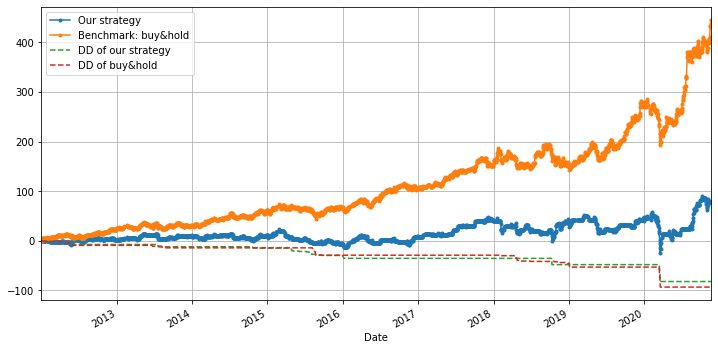

In [45]:
asset[["PV", "buy&hold"]].plot(style = ".-", grid = True, figsize = (12, 6))
ax = asset["DD of our strategy"].plot(style = "--", grid = True)
ax = asset["DD of buy&hold"].plot(style = "--", grid = True)
ax.legend(["Our strategy", "Benchmark: buy&hold", "DD of our strategy", "DD of buy&hold"])

### What You Can Do
* Change the target asset: https://www.tej.com.tw/webtej/doc/uid.htm
* Modify the program so that it could be used for mulit-asset strategies.
* Replace the asset prices by adjusted asset prices. (Why?)